<a href="https://colab.research.google.com/github/LauJohansson/GAN_Horse2Zebra_and_MNIST/blob/master/Simple_GAN_fullyconnected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST data

Some inspiration to the code made in this notebook:


*   https://github.com/safwankdb/Vanilla-GAN/blob/master/Vanilla_GAN.ipynb
*   https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
*   https://github.com/safwankdb/Vanilla-GAN/blob/master/Vanilla_GAN.ipynb


    
    

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, ConcatDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.utils as vutils

We check that we have a GPU available

In [ ]:
if torch.cuda.is_available():
    print("The code will run on GPU. This is important so things run faster.")
else:
    print("The code will run on CPU. You should probably not do this.")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   

The code will run on GPU. This is important so things run faster.


In [ ]:
'''
# training data normal
train_transform = transforms.Compose([ transforms.ToTensor()])


# training data augmented
train_transform_aug = transforms.Compose([transforms.RandomRotation(20), 
transforms.CenterCrop(28),
transforms.ToTensor(),])

train_transform_aug_2 = transforms.Compose([transforms.RandomApply([
                                                                    transforms.RandomRotation(20), 
                                                                    transforms.CenterCrop(28),
                                                                    transforms.ToTensor()])])


# https://pytorch.org/docs/stable/torchvision/transforms.html


# test data normal
test_transform =transforms.Compose([transforms.ToTensor()])

batch_size = 64

# combining the two training sets
trainset1 = datasets.MNIST('./data', train=True, download=True, transform=train_transform)
trainset2 = datasets.MNIST('./data', train=True, download=True, transform=train_transform_aug)
trainset3 = datasets.MNIST('./data', train=True, download=True, transform=train_transform_aug_2)
trainset = ConcatDataset([trainset1, trainset2, trainset3])

# loading train
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1)

# loading test
testset = datasets.MNIST('./data', train=True, download=True, transform=test_transform)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=1)
'''

"\n# training data normal\ntrain_transform = transforms.Compose([ transforms.ToTensor()])\n\n\n# training data augmented\ntrain_transform_aug = transforms.Compose([transforms.RandomRotation(20), \ntransforms.CenterCrop(28),\ntransforms.ToTensor(),])\n\ntrain_transform_aug_2 = transforms.Compose([transforms.RandomApply([\n                                                                    transforms.RandomRotation(20), \n                                                                    transforms.CenterCrop(28),\n                                                                    transforms.ToTensor()])])\n\n\n# https://pytorch.org/docs/stable/torchvision/transforms.html\n\n\n# test data normal\ntest_transform =transforms.Compose([transforms.ToTensor()])\n\nbatch_size = 64\n\n# combining the two training sets\ntrainset1 = datasets.MNIST('./data', train=True, download=True, transform=train_transform)\ntrainset2 = datasets.MNIST('./data', train=True, download=True, transform=train_trans

In [ ]:
transform_custom = transforms.Compose([
transforms.RandomRotation(20), 
transforms.CenterCrop(28),
transforms.ToTensor(),
])

In [ ]:
batch_size = 64
trainset = datasets.MNIST('./data', train=True, download=True, transform=transform_custom)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1)
testset = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=1)

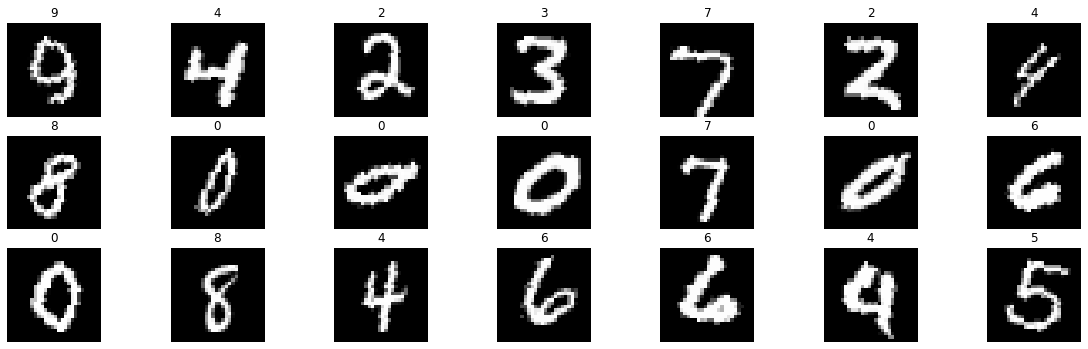

In [ ]:
images, labels = next(iter(train_loader))
plt.figure(figsize=(20,10))

for i in range(21):
    plt.subplot(5,7,i+1)
    plt.imshow(images[i].numpy()[0], 'gray')
    plt.title(labels[i].item())
    plt.axis('off')

# Generator and discriminator

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fully_connected = nn.Sequential(
                nn.Linear(28*28, 5000), 
                nn.ReLU(),
                nn.Linear(5000, 5000),
                nn.ReLU(),
                nn.Linear(5000, 28*28),
                nn.Sigmoid()
                )
              
    def forward(self, x):
        x = x.view(x.size(0),-1)
        x = self.fully_connected(x)
        return x

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fully_connected = nn.Sequential(
                nn.Linear(28*28, 5000), 
                nn.LeakyReLU(0.2),
                nn.Dropout(0.3),
                nn.Linear(5000, 5000),
                nn.LeakyReLU(0.2),
                nn.Dropout(0.3),
                nn.Linear(5000, 28*28),
                nn.Sigmoid()
                
                )
    def forward(self, x):
        x = x.view(x.size(0),-1)
        x = self.fully_connected(x)
        return x

# Initialize model

In [ ]:
net_G = Generator().to(device)
net_D = Discriminator().to(device)

# Initialize optimizer

In [ ]:
optimizer_G = torch.optim.SGD(net_G.parameters(), lr=0.02)
optimizer_D=torch.optim.SGD(net_D.parameters(), lr=0.02)


In [ ]:
optimizer_G.param_groups[0]['betas']=(0.5,0.99)
optimizer_D.param_groups[0]['betas']=(0.5,0.99)


# Initialize loss

In [ ]:
criterion = nn.BCELoss()

# Train

In [ ]:
real_label = 1
fake_label = 0

In [ ]:
for i, (data, target) in enumerate(train_loader):
  data1=data.to(device)
  break

In [ ]:
fixed_noise = torch.randn_like(data1, device=device)

Conceptual model:

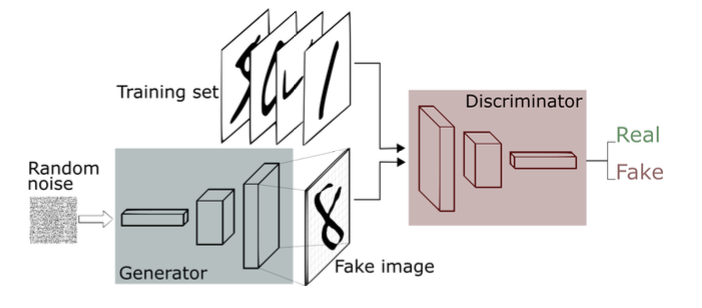

In [ ]:
from torch.autograd import Variable

In [ ]:
# Training Loop
num_epochs=30

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    #for minibatch_no, (data, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
    for i, (data, target) in enumerate(train_loader):
    
        data=data.to(device)
        
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        net_D.zero_grad()
        
        output = net_D(data)

        label= Variable(torch.ones_like(output))
        label=label.to(device)
        
        
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn_like(data)
        

        # Generate fake image batch with G
        fake = net_G(noise)
        
        label.fill_(fake_label)

        # Classify all fake batch with D
        
        output = net_D(fake.detach())
        
        errD_fake = criterion(output, label)  
        errD_fake.backward()
        D_G_z1 = output.mean().item()

        # Add the gradients from the all-real and all-fake batches
        errD = errD_real + errD_fake
        # Update D
        optimizer_D.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        net_G.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = net_D(fake)
        
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()

        optimizer_G.step()

        # Output training stats
        if i % 300 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(train_loader)-1)):
            with torch.no_grad():
                fake = net_G(fixed_noise).detach().cpu()
                fake=fake.view(-1,64,1,28,28)
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/30][0/938]	Loss_D: 1.3866	Loss_G: 0.6946	D(x): 0.5001	D(G(z)): 0.4998 / 0.4996
[0/30][50/938]	Loss_D: 1.3732	Loss_G: 0.7111	D(x): 0.4988	D(G(z)): 0.4917 / 0.4915
[0/30][100/938]	Loss_D: 1.3576	Loss_G: 0.7313	D(x): 0.4973	D(G(z)): 0.4822 / 0.4817
[0/30][150/938]	Loss_D: 1.3359	Loss_G: 0.7583	D(x): 0.4958	D(G(z)): 0.4691 / 0.4690
[0/30][200/938]	Loss_D: 1.3077	Loss_G: 0.8023	D(x): 0.4923	D(G(z)): 0.4499 / 0.4490
[0/30][250/938]	Loss_D: 1.2628	Loss_G: 0.8694	D(x): 0.4894	D(G(z)): 0.4211 / 0.4202
[0/30][300/938]	Loss_D: 1.2072	Loss_G: 0.9753	D(x): 0.4832	D(G(z)): 0.3799 / 0.3785
[0/30][350/938]	Loss_D: 1.1361	Loss_G: 1.1337	D(x): 0.4780	D(G(z)): 0.3269 / 0.3238
[0/30][400/938]	Loss_D: 1.0627	Loss_G: 1.3144	D(x): 0.4749	D(G(z)): 0.2709 / 0.2709
[0/30][450/938]	Loss_D: 1.0014	Loss_G: 1.4789	D(x): 0.4788	D(G(z)): 0.2315 / 0.2302
[0/30][500/938]	Loss_D: 1.0016	Loss_G: 1.4451	D(x): 0.4832	D(G(z)): 0.2386 / 0.2374
[0/30][550/938]	Loss_D: 1.1281	Loss_G: 1.1137	D(x): 0

#Plotting fake numbers:

In [ ]:
#plt.rcParams['figure.figsize'] = [20, 20]

#for k in range(batch_size):
#    
#    plt.subplot(10, 7, k+1)
#    plt.imshow(img_list[-1][k][0].numpy(),cmap='gray') #-1 for the last in img_list
#    plt.title('Fake')
#    plt.axis('off')

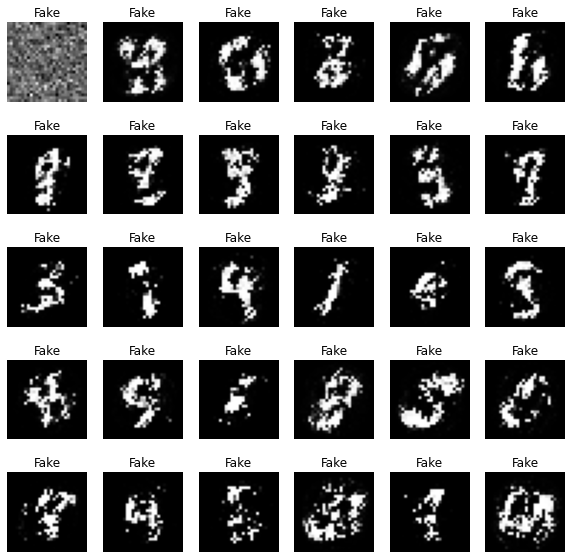

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
#plt.figure(1)
for k in range(num_epochs):
    
    plt.subplot(5, 6, k+1)
    plt.imshow(img_list[-k][0][0].numpy(),cmap='gray') #-1 for the last in img_list
    plt.title('Fake')
    plt.axis('off')

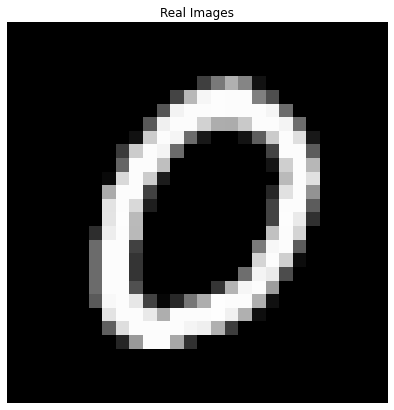

In [ ]:
# Grab a batch of real images from the dataloader
real_batch,_ = next(iter(train_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

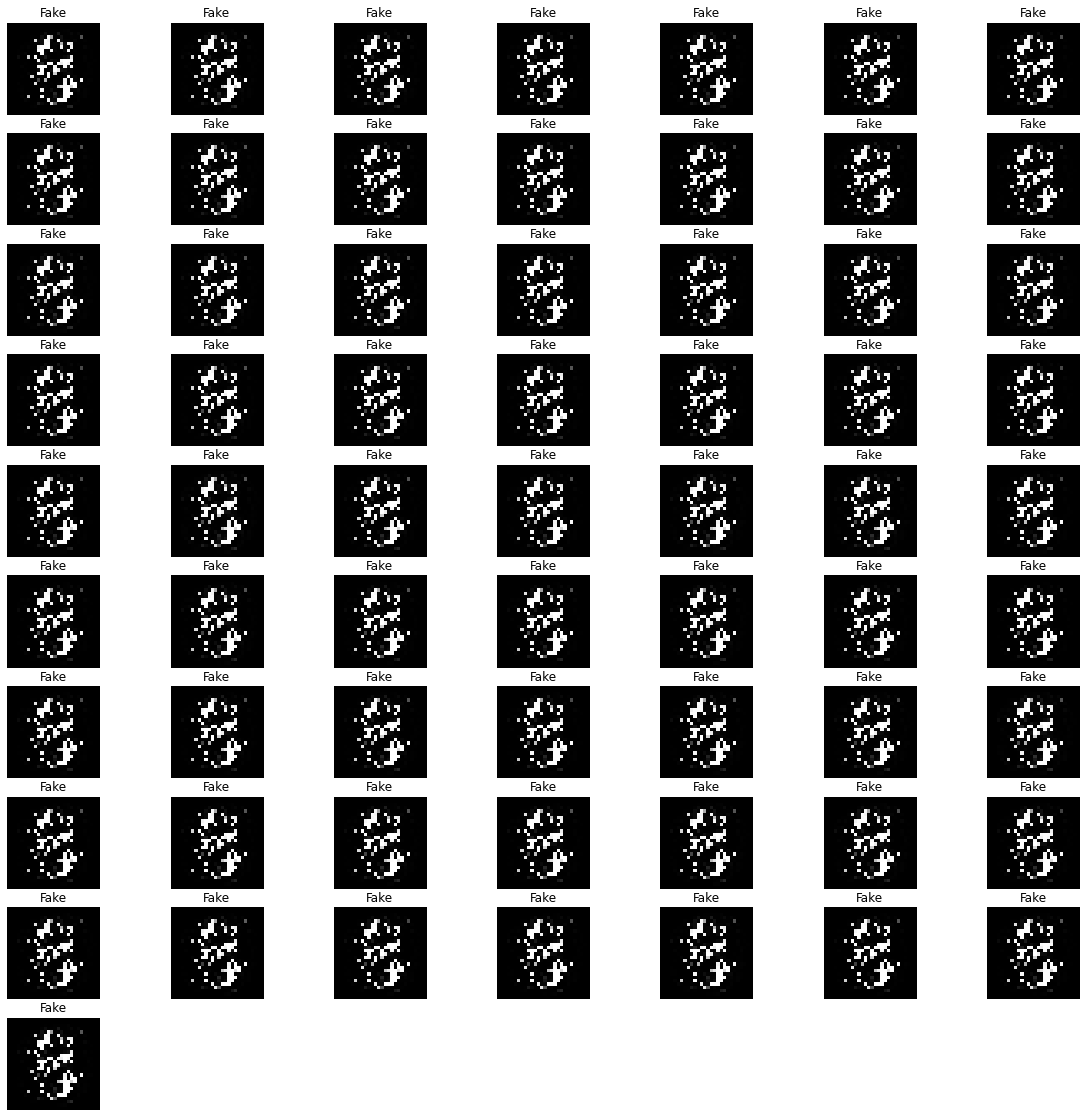

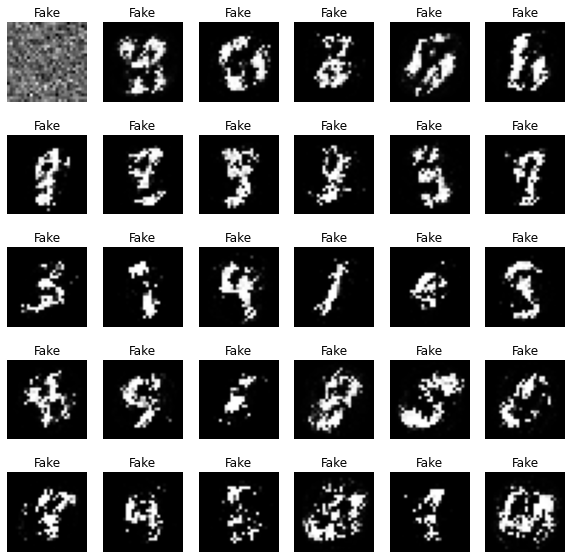

# Interpolation (no good results)

Code implemetation inspired by: https://colab.research.google.com/github/smartgeometry-ucl/dl4g/blob/master/gan.ipynb#scrollTo=9WHvOQs87C00

In [ ]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x

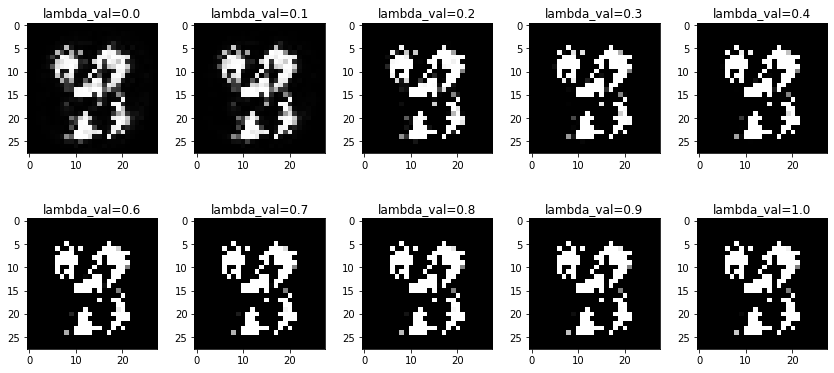

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

net_G.eval()

def interpolation(lambda1, model, latent_1, latent_2):

    with torch.no_grad():

        # interpolation of the two latent vectors
        inter_latent = lambda1* latent_1 + (1- lambda1) * latent_2

        # reconstruct interpolated image
        inter_latent = inter_latent.to(device)
        inter_image = model(inter_latent)
        inter_image = inter_image.cpu()
        return inter_image.view(-1,64,1,28,28).squeeze(0)
    


latent_1 = torch.randn_like(real_batch, device=device)
latent_2 = torch.randn_like(real_batch, device=device)


# interpolation lambdas
#lambda_range=np.linspace(0,10,100)
lambda_range=np.linspace(0,1,10)

fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for ind,l in enumerate(lambda_range):

    inter_image=interpolation(float(l)*10, net_G, latent_1, latent_2)
   
    #inter_image = to_img(inter_image)
    
    #image = inter_image[0,0,:,:].numpy()

    #axs[ind].imshow(image[0,0,:,:], cmap='gray')
    axs[ind].imshow(inter_image[0,0,:,:], cmap='gray')
    axs[ind].set_title('lambda_val='+str(round(l,1)))
plt.show() 